## Importing Necessary Libraries

In [55]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt


## Registering Matplotlib Converters

In [56]:
register_matplotlib_converters()

## Loading the Dataset

In [57]:
df = pd.read_csv('UniTech Sales Data.csv')
df.head()

,Date of Order,Store Code,Item Code,sales,Model Name,District,State,Country,Year
0,1/1/2016,1,1,13,Hulu_1,Ratnagiri,Maharashtra,India,2016
1,1/2/2016,1,1,11,Hulu_1,Ratnagiri,Maharashtra,India,2016
2,1/3/2016,1,1,14,Hulu_1,Mumbai City,Maharashtra,India,2016
3,1/4/2016,1,1,13,Hulu_1,Aurangabad,Maharashtra,India,2016
4,1/5/2016,1,1,10,Hulu_1,Aurangabad,Maharashtra,India,2016


## Printing Columns

In [58]:
print(df.columns)

Index(['Date of Order', 'Store Code', 'Item Code', 'sales', 'Model Name ',
       'District ', 'State ', 'Country ', 'Year'],
      dtype='object')


## Dropping Unnecessary Columns

In [59]:
df = df.drop(columns=['Store Code', 'Item Code', 'Model Name ', 'District ', 'State ', 'Country ', 'Year'])

## Converting 'Date of Order' to DateTime Format

In [60]:
df['Date of Order'] = pd.to_datetime(df['Date of Order'])

## Grouping Sales by 'Date of Order' for Time Series Analysis

In [61]:
time_series_data = df.groupby('Date of Order')['sales'].sum()

## Normalizing Sales Data using MinMaxScaler

In [62]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_sales = scaler.fit_transform(time_series_data.values.reshape(-1, 1))

## Plotting Scales Sales Trend Over Time

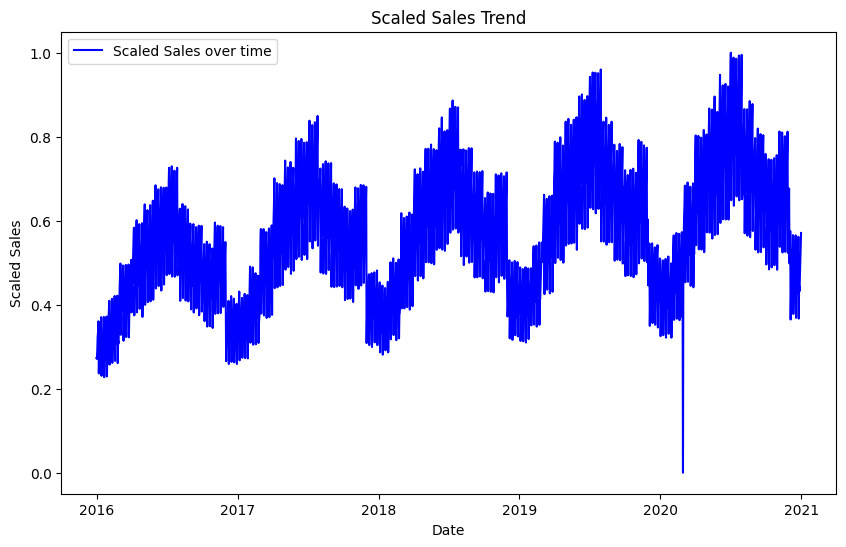

In [63]:
plt.figure(figsize=(10,6))
plt.plot(time_series_data.index, scaled_sales, label='Scaled Sales over time', color='blue')
plt.title('Scaled Sales Trend')
plt.xlabel('Date')
plt.ylabel('Scaled Sales')
plt.legend()
plt.show()

## ARIMA Model for Forecasting Sales and Inverse Scaling

In [64]:
model = ARIMA(scaled_sales, order=(1,1,1))
model_fit = model.fit()
forecast_scaled = model_fit.forecast(steps=90)
forecast = scaler.inverse_transform(forecast_scaled.reshape(-1, 1))

## Printing Forecasted Sales Values

In [65]:
print("Forecast values for next 90 days:", forecast)

Forecast values for next 90 days: [[9861.02169544]
 [9631.87134817]
 [9582.0507006 ]
 [9571.21896086]
 [9568.86398172]
 [9568.3519747 ]
 [9568.24065686]
 [9568.21645473]
 [9568.21119283]
 [9568.21004882]
 [9568.20980009]
 [9568.20974602]
 [9568.20973426]
 [9568.2097317 ]
 [9568.20973115]
 [9568.20973103]
 [9568.209731  ]
 [9568.209731  ]
 [9568.20973099]
 [9568.20973099]
 [9568.20973099]
 [9568.20973099]
 [9568.20973099]
 [9568.20973099]
 [9568.20973099]
 [9568.20973099]
 [9568.20973099]
 [9568.20973099]
 [9568.20973099]
 [9568.20973099]
 [9568.20973099]
 [9568.20973099]
 [9568.20973099]
 [9568.20973099]
 [9568.20973099]
 [9568.20973099]
 [9568.20973099]
 [9568.20973099]
 [9568.20973099]
 [9568.20973099]
 [9568.20973099]
 [9568.20973099]
 [9568.20973099]
 [9568.20973099]
 [9568.20973099]
 [9568.20973099]
 [9568.20973099]
 [9568.20973099]
 [9568.20973099]
 [9568.20973099]
 [9568.20973099]
 [9568.20973099]
 [9568.20973099]
 [9568.20973099]
 [9568.20973099]
 [9568.20973099]
 [9568.2097309

## Plotting Historical and Forecasted Sales

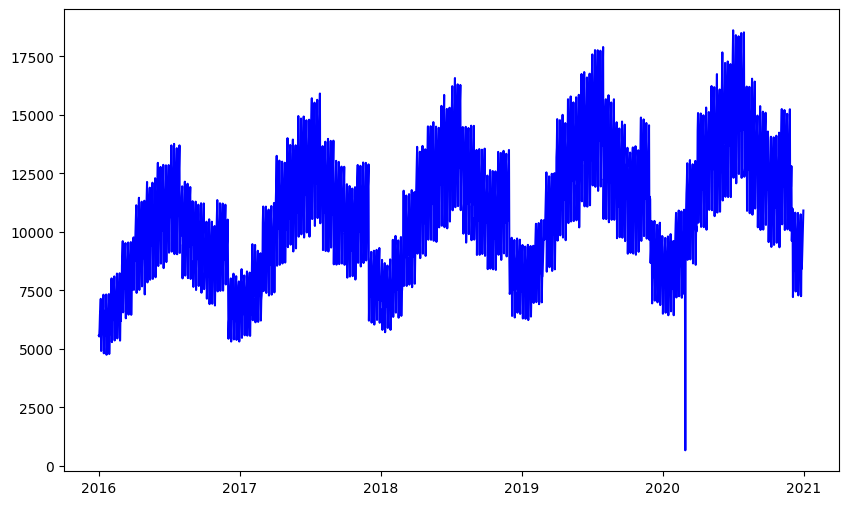

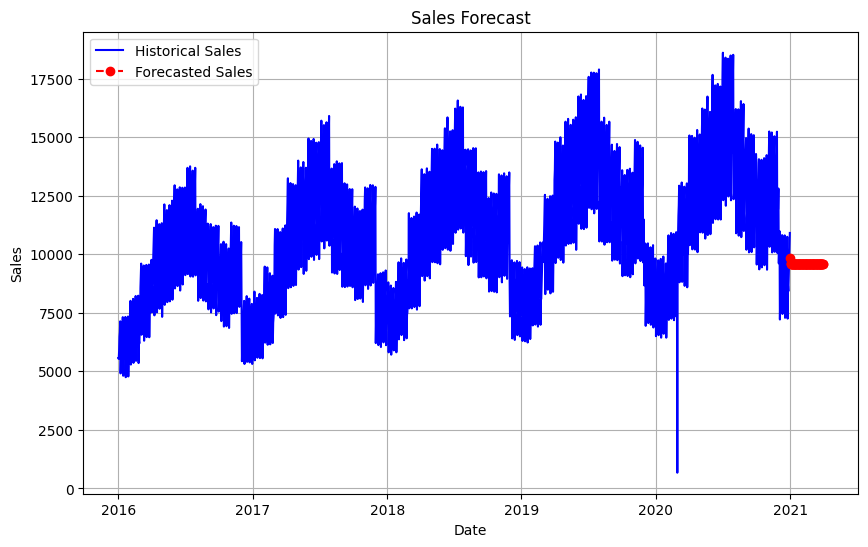

In [66]:
plt.figure(figsize=(10,6))
plt.plot(time_series_data.index, time_series_data, label='Historical Sales', color='blue')

if len(forecast) > 0:
    forecast_dates = pd.date_range(start=time_series_data.index[-1] + pd.Timedelta(days=1), periods=len(forecast), freq='D')
plt.figure(figsize=(10,6))

plt.plot(time_series_data.index, time_series_data, label='Historical Sales', color='blue')

if len(forecast) > 0:
    forecast_dates = pd.date_range(start=time_series_data.index[-1] + pd.Timedelta(days=1), periods=len(forecast), freq='D')
    plt.plot(forecast_dates, forecast.flatten(), label='Forecasted Sales', color='red', linestyle='--', marker='o')
else:
    print("Forecast is empty or not calculated correctly")

plt.title('Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

## Conclusion

In this notebook, we have developed a basic small-scale implementation for demand forecasting using time-series analysis with the ARIMA model. By preprocessing the data, applying MinMax scaling, and visualizing both historical and forecasted sales trends, we have demonstrated the effectiveness of utilizing advanced statistical methods for demand prediction.

The insights gained from this analysis provide valuable information for decision-making, allowing businesses to better manage their inventory and improve overall operational efficiency. However, it is important to note that this is just a foundational model, and there is significant scope for further development. Enhancements could include incorporating more complex machine learning techniques, exploring additional features, and refining the model for greater accuracy.

Overall, this work would contribute to the development of OptiChainmto optimize supply chain processes for SMEs through data-driven solutions and sets the stage for further enhancements.
